In [1]:
# Turn of warnings
import warnings
warnings.filterwarnings('ignore')

### Objective

Our aim is to explore and analyze the BuddyMove dataset to classify user interest in the 'Sports' category based on their activity preferences in other categories. This analysis will involve the following key steps:

- **Data Pre-processing**: Clean the dataset by handling any inconsistencies and transforming the 'Sports' column into a categorical target variable with 'High Interest' and 'Low Interest' classes. Standardize the remaining features to ensure consistency and enhance classification performance.

- **Exploratory Data Analysis (EDA)**: Perform a thorough analysis of the dataset by generating descriptive statistics and visualizing the distributions and relationships between different attributes. This step aims to gain initial insights and identify potential patterns within the data.

- **Feature Selection**: Select the appropriate features for the classification task by evaluating the variance and correlation of the attributes to ensure high variance and low redundancy.

- **Classification Analysis**: Apply two different classification algorithms, k-Nearest Neighbors and Decision Tree, to the pre-processed data. Train each model, selecting appropriate parameters, and evaluate their performance in classifying user interest in the 'Sports' category.

- **Model Evaluation and Comparison**: Evaluate the performance of each classification model using metrics such as accuracy, confusion matrix, and classification report. Compare the results of both classification techniques to understand their strengths and weaknesses.

- **Recommendation**: Based on the evaluation and comparison, recommend the most suitable model for predicting user interest in the 'Sports' category, providing insights into the factors that influence this interest.

By achieving these objectives, the goal is to uncover meaningful patterns and insights within the BuddyMove dataset, which can provide valuable information on user behavior and preferences in various activity categories.
ity categories.
ferences.

## Dataset Overview

The BuddyMove Data Set contains user interest information extracted from user reviews published on holidayiq.com about various types of points of interest in South India. The dataset includes reviews falling into six categories among destinations across South India. The count of reviews in each category for every reviewer (traveler) is captured.

### Features in the Dataset

1. **User Id**: Unique identifier for each user.
2. **Religious**: Count of reviews in the Religious category.
3. **Nature**: Count of reviews in the Nature category.
4. **Theatre**: Count of reviews in the Theatre category.
5. **Shopping**: Count of reviews in the Shopping category.
6. **Picnic**: Count of reviews in the Picnic category.
7. **Sports**: Category indicating the user's interest in sports (High Interest or Lowtaset
Buddy.head()


# Task 1: Retrieving and Preparing the Data

**Objective:** The aim of this task is to carefully inspect and prepare the BuddyMove Data for analysis. This involves loading the CSV data from the specified file, ensuring its equivalence to the source, and addressing any potential issues or errors through data cleaning techniques taught in lectures.

Let's start by loading the BuddyMove dataset which contains destination reviews published by 249 reviewers of holidayiq.com till October 2014

In [3]:
# Read csv in dataframe and check for bad lines
import pandas as pd

# Load the CSV file into a DataFrame. separtor is ','. Decimal points are '.'. Headers are the first row. We rename the headers.
Buddy = pd.read_csv('buddymove_holidayiq.csv', sep =',', decimal='.', header=0
                  , on_bad_lines='warn') # Pandas 2.2 (stable) version in use. Change this to error_bad_line = False if using lesser version of Pandas.

##### Check whether the loaded data is equivalent to the data in the source CSV file

Source data is a csv file, so we visually inspect the loaded data to ensure it matches the expected format and values from the source file.

In [4]:
# Display the first few rows of the DataFrame to inspect the data
Buddy.head()

,User Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,User 1,2,77,79,69,68,95
1,User 2,2,62,76,76,69,68
2,User 3,2,50,97,87,50,75
3,User 4,2,68,77,95,76,61
4,User 5,2,98,54,59,95,86


In [5]:
# Our csv file has 249 rows in total excluding the headers. And 7 columns. Lets Check number of columns and row in our dataframe
Buddy.shape

(249, 7)

Data looks same as in the csv file with 7 columns and 249 rows. Data is loaded fully.

### Data Preprocessing (Data entry, impossible values, missing values, outliers, and sanity check): 

Data cleaning is a multi-step process.
We will look at data entry errors, redundant white spaces, impossible values/sanity checks, missing values, checking for outliers

Lets begin by checking intial information of the dataset

In [6]:
# Display basic information about the dataset
print(Buddy.info())
print(Buddy.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User Id    249 non-null    object
 1   Sports     249 non-null    int64 
 2   Religious  249 non-null    int64 
 3   Nature     249 non-null    int64 
 4   Theatre    249 non-null    int64 
 5   Shopping   249 non-null    int64 
 6   Picnic     249 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 13.7+ KB
None
           Sports   Religious      Nature     Theatre    Shopping      Picnic
count  249.000000  249.000000  249.000000  249.000000  249.000000  249.000000
mean    11.987952  109.779116  124.518072  116.377510  112.638554  120.401606
std      6.616501   32.454115   45.639372   32.132696   41.562888   32.633339
min      2.000000   50.000000   52.000000   59.000000   50.000000   61.000000
25%      6.000000   84.000000   89.000000   93.000000   79.000000   92.000000
50%     12.000000  10

From the data info and description we understand that -

- The 6 attributes, namely, **Sports, Religious, Nature, Theatre, Shopping and Picnic are our features** and **Int type** as expected.
- **User Id** column is object type and **is not a descriptive feature for the analysis**.
- There are **no missing values in the dataset** since each column holds 249 non-null values. Hence, **no need to check for missing values**.
- The max and min for each of the columns do not hold an outrageous or impossible value. Hence, it is unliley that impossible values or data entry errors appears.
- Still there maybe outliers.

Although the data description suggests the BuddyMove dataset is clean, lets closely preprocess the data in a step by step manner.

### Step 1: Drop unnecessary columns

In [7]:
# Remove the UserID column as it is not useful for analysis
Buddy = Buddy.drop(columns=['User Id'])
Buddy.head(2) # See User Id is dropped

,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,2,77,79,69,68,95
1,2,62,76,76,69,68


### Step 2: Check for Missing Values

In [8]:
# Check for missing values
print("\nMissing values in the dataset:")
print(Buddy.isnull().sum())


Missing values in the dataset:
Sports       0
Religious    0
Nature       0
Theatre      0
Shopping     0
Picnic       0
dtype: int64


No missing values.

### Step 3: Check for duplicate values

In [9]:
# Check for duplicates
print("\nDuplicate rows in the dataset:", Buddy.duplicated().sum())


Duplicate rows in the dataset: 0


### Step 4: Handle Data entry errors

We will check if any of the 6 columns holds data that doesn't make sense or is illogical. Lets begin with the first column, Sports

#### For Column 1: 'Sports'

In [10]:
# Get distinct values for Sports column
Buddy['Sports'].sort_values().unique()

array([ 2,  3,  4,  5,  6,  8, 10, 12, 14, 16, 18, 20, 22, 25],
      dtype=int64)

No illogical values exist for the count of reviews in Sports category. 

#### For Column 2: 'Religious'

In [11]:
# Get distinct values for Sports column
Buddy['Religious'].sort_values().unique()

array([ 50,  51,  52,  54,  56,  59,  62,  63,  64,  65,  68,  69,  71,
        74,  76,  77,  79,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  93,  94,  96,  97,  98,  99, 100, 101, 103, 104, 105,
       107, 108, 109, 113, 114, 115, 118, 119, 120, 123, 124, 128, 129,
       132, 133, 135, 137, 138, 139, 143, 144, 147, 148, 153, 158, 162,
       163, 165, 168, 173, 178, 183, 184, 188, 198, 203], dtype=int64)

No illogical values exist for the count of reviews in Religious category. 

#### For Column 3: 'Nature'

In [12]:
# Get distinct values for Sports column
Buddy['Nature'].sort_values().unique()

array([ 52,  53,  54,  59,  60,  61,  64,  66,  67,  68,  69,  72,  74,
        76,  77,  79,  82,  83,  84,  85,  86,  87,  89,  92,  93,  94,
        97,  98,  99, 103, 104, 107, 108, 109, 111, 113, 114, 115, 118,
       119, 122, 123, 124, 128, 129, 130, 131, 133, 134, 135, 137, 138,
       139, 140, 143, 144, 148, 149, 150, 153, 154, 155, 158, 159, 161,
       163, 168, 173, 174, 178, 183, 188, 193, 198, 203, 208, 213, 218,
       228, 238, 243, 247, 318], dtype=int64)

No illogical values exist for the count of reviews in Nature category. 

#### For Column 4: 'Theatre'

In [13]:
# Get distinct values for Sports column
Buddy['Theatre'].sort_values().unique()

array([ 59,  63,  64,  65,  68,  69,  74,  75,  76,  79,  81,  82,  84,
        86,  87,  89,  90,  92,  93,  94,  95,  98,  99, 101, 102, 103,
       104, 106, 108, 109, 110, 111, 112, 113, 114, 118, 119, 123, 124,
       125, 128, 129, 133, 134, 138, 139, 141, 143, 144, 148, 149, 153,
       154, 157, 158, 163, 164, 168, 173, 178, 183, 188, 193, 208, 213],
      dtype=int64)

No illogical values exist for the count of reviews in Theatre category. 

#### For Column 5: 'Shopping'

In [14]:
# Get distinct values for Sports column
Buddy['Shopping'].sort_values().unique()

array([ 50,  51,  52,  53,  54,  56,  59,  61,  63,  64,  65,  66,  68,
        69,  70,  71,  73,  74,  75,  76,  78,  79,  80,  81,  83,  84,
        85,  87,  89,  90,  91,  92,  93,  94,  95,  98,  99, 102, 103,
       104, 109, 111, 112, 113, 114, 116, 117, 118, 119, 123, 124, 125,
       128, 129, 133, 134, 138, 139, 141, 143, 144, 148, 149, 154, 158,
       159, 163, 168, 173, 175, 183, 188, 193, 198, 203, 208, 213, 223,
       233], dtype=int64)

No illogical values exist for the count of reviews in Shopping category. 

#### For Column 6: 'Picnic'

In [15]:
# Get distinct values for Sports column
Buddy['Picnic'].sort_values().unique()

array([ 61,  68,  69,  71,  72,  73,  75,  76,  77,  78,  79,  81,  82,
        83,  84,  85,  86,  88,  89,  90,  91,  92,  93,  94,  95,  97,
        99, 100, 101, 102, 103, 104, 105, 108, 109, 110, 111, 112, 113,
       114, 116, 118, 119, 120, 122, 123, 124, 126, 128, 129, 130, 133,
       134, 135, 138, 139, 140, 143, 144, 148, 149, 153, 158, 163, 168,
       173, 174, 178, 183, 188, 193, 198, 203, 213, 218], dtype=int64)

No illogical values exist for the count of reviews in Picnic category. 

### Step 5: Handle Impossible values and sanity check

For all the 6 columns, lets check for negative values or values greater than a threshold of say 500 reviews.

In [16]:
# Define the acceptable range for ratings
min_value = 0
max_value = 500

# Check for impossible values in each column
impossible_values = (Buddy < min_value) | (Buddy > max_value)
print("Impossible values:\n", impossible_values.sum())

Impossible values:
 Sports       0
Religious    0
Nature       0
Theatre      0
Shopping     0
Picnic       0
dtype: int64


No impossible values exist in the BuddyMove Dataset.

### Step 5: Check Data Formatting

Data Formatting: Ensure that data types are appropriate for each column. That is, all 6 features should be in integer format.

In [17]:
# Check data types of columns
print("\nData types of columns:")
print(Buddy.dtypes)


Data types of columns:
Sports       int64
Religious    int64
Nature       int64
Theatre      int64
Shopping     int64
Picnic       int64
dtype: object


### Step 6: Check for Outliers

We can identify outliers in the four columns by employing boxplots and visually examining them.

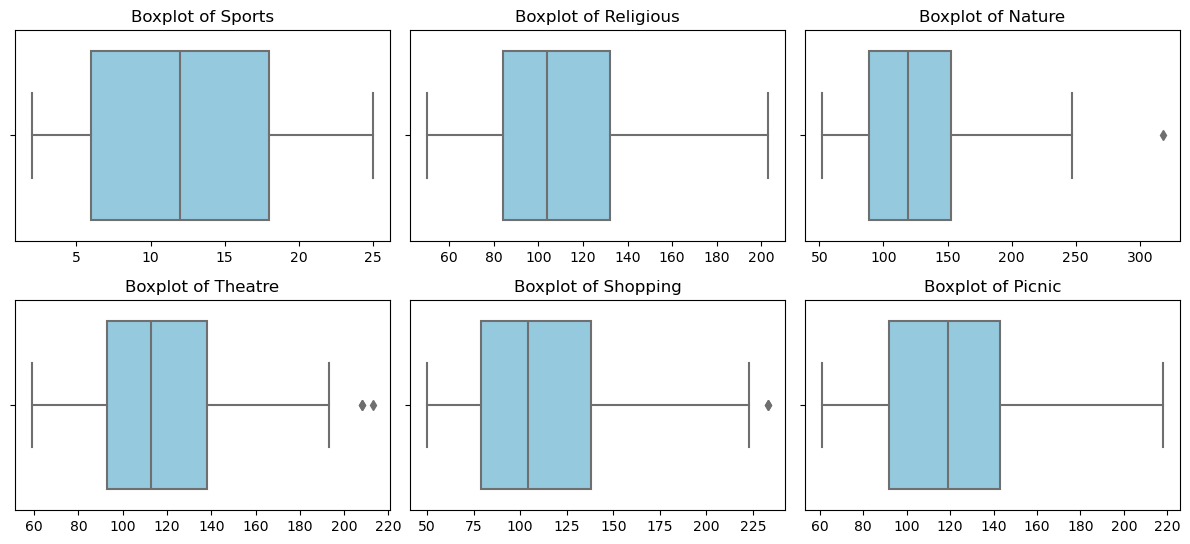

In [18]:
numeric_columns = ['Sports', 'Religious', 'Nature', 'Theatre', 'Shopping', 'Picnic']

import seaborn as sns
import matplotlib.pyplot as plt

# Creating boxplots for each numeric column to visualize outliers
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=Buddy[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

Boxplots of Nature, Theatre and Shopping suggest outliers. 
- In Nature column, the outlier value is 318
- In Theatre column, the outliers value is between 200 and 220
- In Shopping column, the outlier value is 233 .

In these three features, we notice that only a small fraction of the records are classified as outliers. This is mainly because the majority of review counts fall within the range of 50 to 200, while review counts exceeding 200 are much less common. This distribution is more evident in the histograms for the Nature, Theatre, and Shopping features.

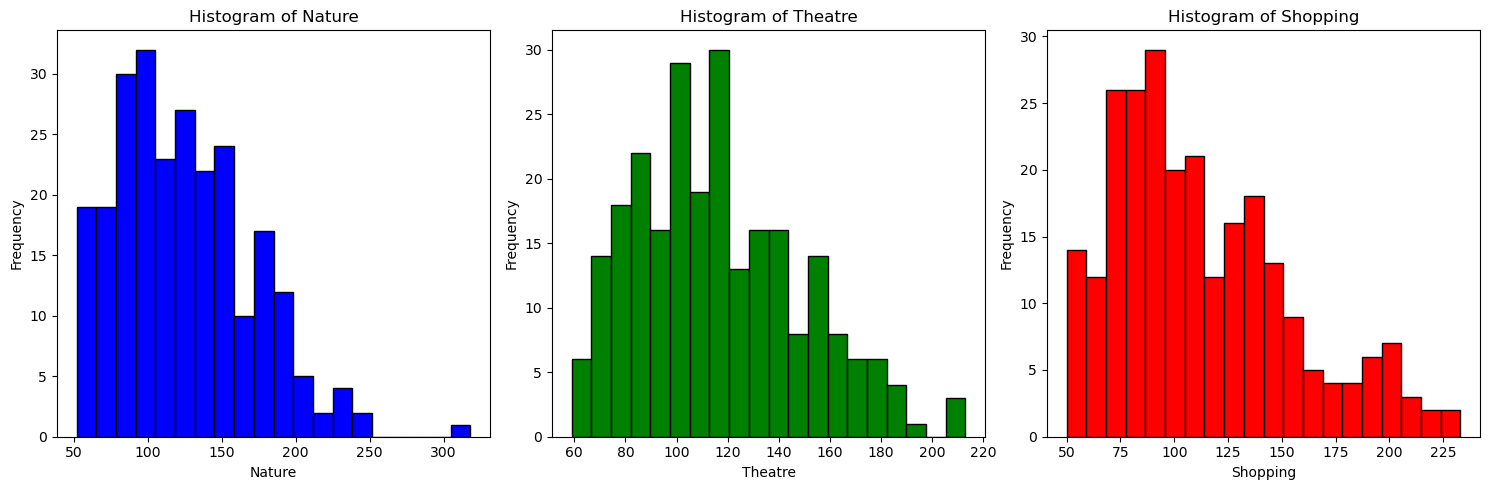

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot histograms for the "Nature", "Theatre", and "Shopping" columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogram for the "Nature" column
axes[0].hist(Buddy['Nature'], bins=20, color='blue', edgecolor='black')
axes[0].set_title('Histogram of Nature')
axes[0].set_xlabel('Nature')
axes[0].set_ylabel('Frequency')

# Histogram for the "Theatre" column
axes[1].hist(Buddy['Theatre'], bins=20, color='green', edgecolor='black')
axes[1].set_title('Histogram of Theatre')
axes[1].set_xlabel('Theatre')
axes[1].set_ylabel('Frequency')

# Histogram for the "Shopping" column
axes[2].hist(Buddy['Shopping'], bins=20, color='red', edgecolor='black')
axes[2].set_title('Histogram of Shopping')
axes[2].set_xlabel('Shopping')
axes[2].set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the histograms
plt.show()


Since the outliers are not excessively high and are unlikely to have a significant impact on our model, we have decided to retain them in our dataset.

### Step 7: Transform the Target Column ('Sports')

- Calculate the average number of reviews for 'Sports'.
- Create a new column 'Sports_Category' with 'High Interest' and 'Low Interest' based on the average value.

In [20]:
import numpy as np

# Calculate the average number of reviews for 'Sports'
sports_mean = Buddy['Sports'].mean()

# Create a new column 'Sports_Category' with 'High Interest' and 'Low Interest'
Buddy['Sports_Category'] = np.where(Buddy['Sports'] > sports_mean, 'High Interest', 'Low Interest')

# Display the distribution of the new category
print(Buddy['Sports_Category'].value_counts())


Sports_Category
High Interest    136
Low Interest     113
Name: count, dtype: int64


In [21]:
Buddy.head()

,Sports,Religious,Nature,Theatre,Shopping,Picnic,Sports_Category
0,2,77,79,69,68,95,Low Interest
1,2,62,76,76,69,68,Low Interest
2,2,50,97,87,50,75,Low Interest
3,2,68,77,95,76,61,Low Interest
4,2,98,54,59,95,86,Low Interest


### Step 8: Standardize the Features

Standardization is necessary for the BuddyMove dataset because the features ('Religious', 'Nature', 'Theatre', 'Shopping', 'Picnic') have different ranges and scales, even though all 5 features hold count of reviews. Standardizing these features ensures they contribute equally to the classification algorithms. This is particularly important for distance-based algorithms like k-Nearest Neighbors (k-NN), which rely on uniform scales for accurate distance calculations. Standardization improves model performance, prevents features with larger ranges from dominating, and leads to more reliable and balanced classification results.


In [22]:
# Select the features and target
features = ['Religious', 'Nature', 'Theatre', 'Shopping', 'Picnic']
target = 'Sports_Category'

X =  Buddy[features]

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the standardized features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
print(X_scaled_df.describe())


          Religious        Nature     Theatre      Shopping        Picnic
count  2.490000e+02  2.490000e+02  249.000000  2.490000e+02  2.490000e+02
mean   5.707171e-17  1.426793e-16    0.000000 -1.426793e-16  1.712151e-16
std    1.002014e+00  1.002014e+00    1.002014  1.002014e+00  1.002014e+00
min   -1.845668e+00 -1.592137e+00   -1.789239 -1.510114e+00 -1.823940e+00
25%   -7.959249e-01 -7.798006e-01   -0.728996 -8.109712e-01 -8.720778e-01
50%   -1.784290e-01 -1.211495e-01   -0.105323 -2.082616e-01 -4.303664e-02
75%    6.860652e-01  6.253218e-01    0.674268  6.114235e-01  6.938888e-01
max    2.878176e+00  4.247903e+00    3.013040  2.901720e+00  2.996781e+00


The 5 descriptive features are stardardised.

**OUR DATA IS NOW CLEAN**

# Task 2: Data Exploration

## Task 2.1 

Explore each column (or at least 10 columns if there are more than 10 columns), using appropriate descriptive statistics and graphs (if appropriate). For each explored column, please think carefully and report in your report in Task 4): 1) the way you used to explore a column (e.g. the graph); 2) what you can observe from the way you used to explore it. (Please format each graph carefully, and use it in your final report. You need to include appropriate labels on the x-axis and y-axis, a title, and a legend. The fonts should be sized for good readability. Components of the graphs should be coloured appropriately, if applicable.)

To achieve this, lets get descriptive statistics for each of the 6 features and use appropriate graphs to explore each feature.

### Descriptive Statistics

In [23]:
# Generate descriptive statistics
descriptive_stats = Buddy.describe()
print(descriptive_stats)

           Sports   Religious      Nature     Theatre    Shopping      Picnic
count  249.000000  249.000000  249.000000  249.000000  249.000000  249.000000
mean    11.987952  109.779116  124.518072  116.377510  112.638554  120.401606
std      6.616501   32.454115   45.639372   32.132696   41.562888   32.633339
min      2.000000   50.000000   52.000000   59.000000   50.000000   61.000000
25%      6.000000   84.000000   89.000000   93.000000   79.000000   92.000000
50%     12.000000  104.000000  119.000000  113.000000  104.000000  119.000000
75%     18.000000  132.000000  153.000000  138.000000  138.000000  143.000000
max     25.000000  203.000000  318.000000  213.000000  233.000000  218.000000


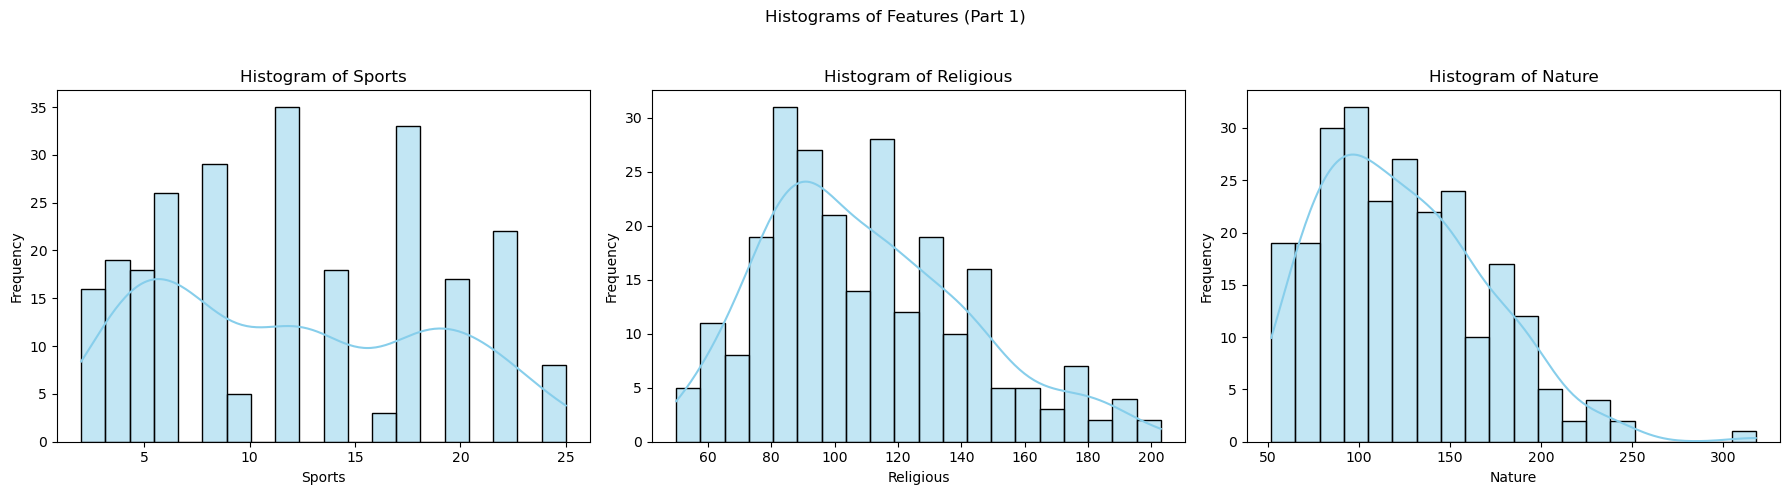

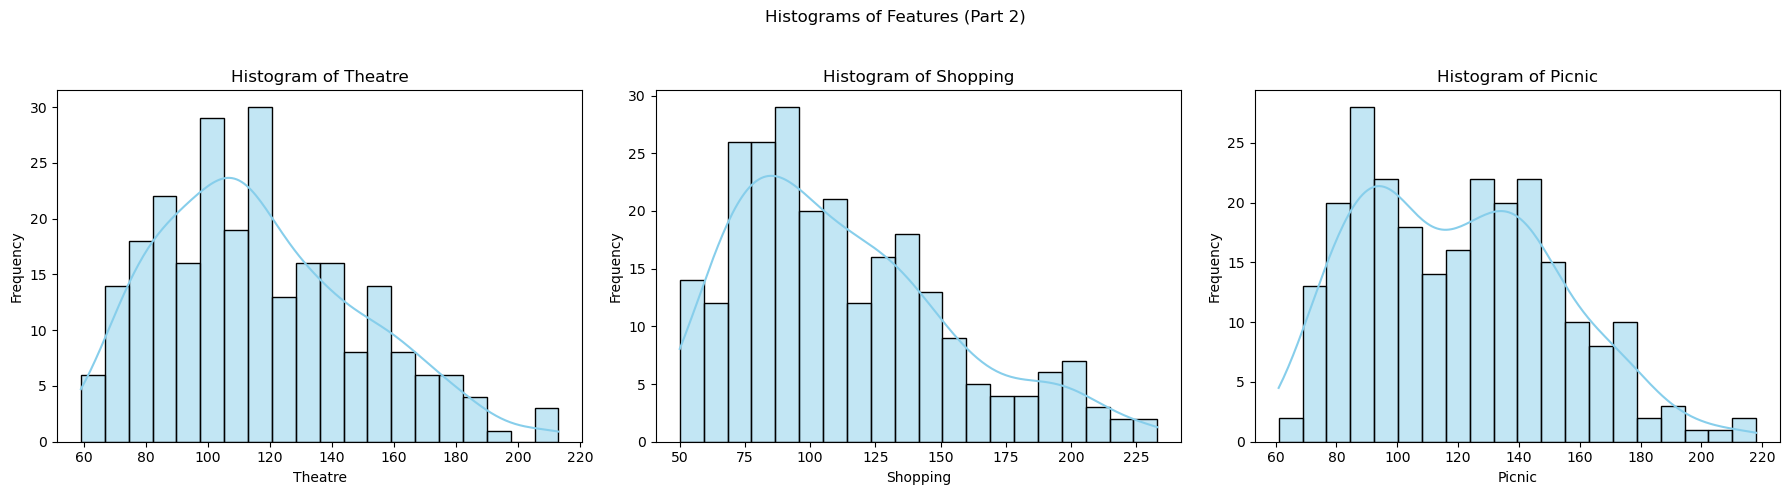

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns to explore
columns = ['Sports', 'Religious', 'Nature', 'Theatre', 'Shopping', 'Picnic']

# Create histograms for each column
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Histograms of Features (Part 1)')

for i, col in enumerate(columns[:3]):
    sns.histplot(Buddy[col], bins=20, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Create histograms for the remaining columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Histograms of Features (Part 2)')

for i, col in enumerate(columns[3:]):
    sns.histplot(Buddy[col], bins=20, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


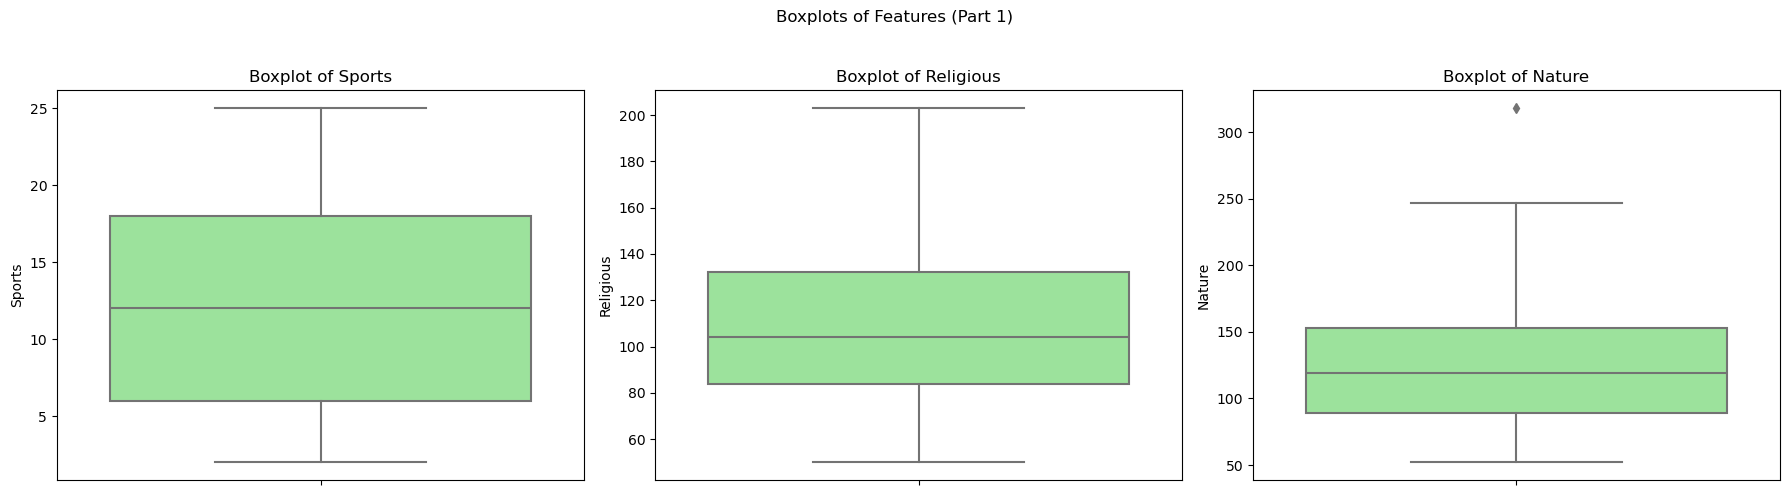

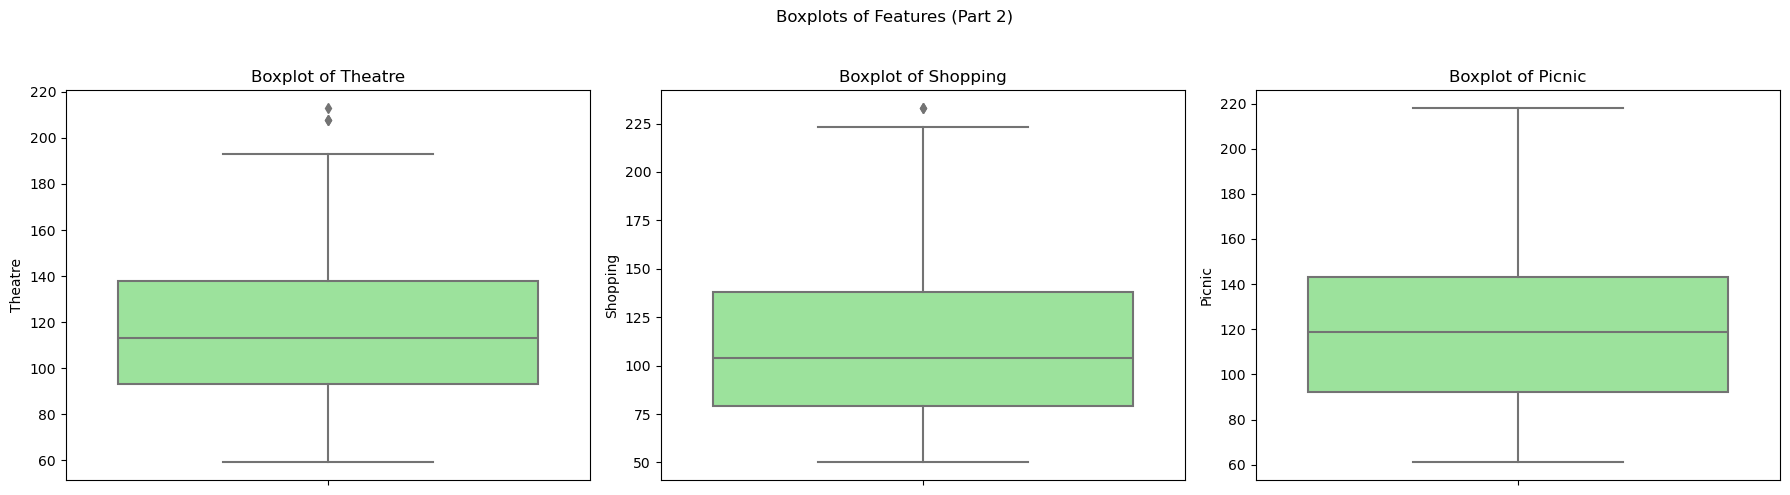

In [56]:
# Create boxplots for each column
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Boxplots of Features (Part 1)')

for i, col in enumerate(columns[:3]):
    sns.boxplot(y=Buddy[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Create boxplots for the remaining columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Boxplots of Features (Part 2)')

for i, col in enumerate(columns[3:]):
    sns.boxplot(y=Buddy[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### Insights and Inferences


##### Sports
- **Descriptive Stats & Histogram**: Users have low and varied engagement in sports activities, with reviews evenly distributed between 2 and 25. The mean is around 12 with moderate variability.
- **Boxplot**: No significant outliers.

**Insight**: Engagement in sports activities is diverse with no significant skew, indicating varied interest levels across users.

##### Religious
- **Descriptive Stats & Histogram**: Users show higher engagement, peaking between 80 and 120 reviews. The mean is about 110 with higher variability.
- **Boxplot**: No significant outliers.

**Insight**: Religious activities have higher user engagement with a concentration in the 80-120 range, showing a right-skewed distribution.

##### Nature
- **Descriptive Stats & Histogram**: Substantial interest in nature activities, peaking between 100 and 150 reviews. The mean is approximately 125 with significant variability.
- **Boxplot**: Outlier at 318.

**Insight**: High interest in nature activities, with an outlier indicating exceptionally high engagement for some users.

##### Theatre
- **Descriptive Stats & Histogram**: Moderate engagement, peaking around 100-120 reviews. The mean is about 116 with moderate variability.
- **Boxplot**: Outliers between 200 and 220.

**Insight**: Users are moderately engaged in theatre activities, with some outliers showing high activity levels.

##### Shopping
- **Descriptive Stats & Histogram**: Popular activity with reviews peaking around 75-125. The mean is about 113 with significant variability.
- **Boxplot**: Outlier at 233.

**Insight**: High engagement in shopping activities, with an outlier indicating exceptionally high interest for some users.

##### Picnic
- **Descriptive Stats & Histogram**: Generally enjoyed with reviews peaking around 80-140. The mean is approximately 120 with moderate variability.
- **Boxplot**: No significant outliers.

**Insight**: Consistent engagement in picnic activities, with most users falling within the 80-140 range.

##### Other Observations
1. **Engagement Levels**: Higher engagement in Religious, Nature, and Shopping activities compared to Sports.
2. **Skewness**: Most distributions are right-skewed, indicating a majority of users with moderate engagement and a few highly active users.
3. **Outliers**: Present in Nature, Theatre, and Shopping, highlighting niche groups with strong preferences.

These insights provide a clear understanding of user engagement patterns across different activities, useful for clustering analysis.


## Task 2.2

Explore the relationship between all pairs of attributes (or at least 10 pairs of attributes, if there are more in the data), and show the relationship in an appropriate graphs. You may choose which pairs of columns to focus on, but you need to generate a visualisation graph for each pair of attributes. Each of the attribute pair should address a plausible hypothesis for the data concerned. In your report, for each plot (pair of attributes), state the hypothesis that you are investigating. Then, briefly discuss any interesting relationships (or lack of relationships) that you can observe from your visualisation.


To explore the relationship between pairs of the 6 attributes, we will use scatter plots and the Pearson correlation coefficient to visualize and quantify the relationships. Let's start with generating the scatter plots for the pairs of attributes and then discuss the hypotheses and insights for each.

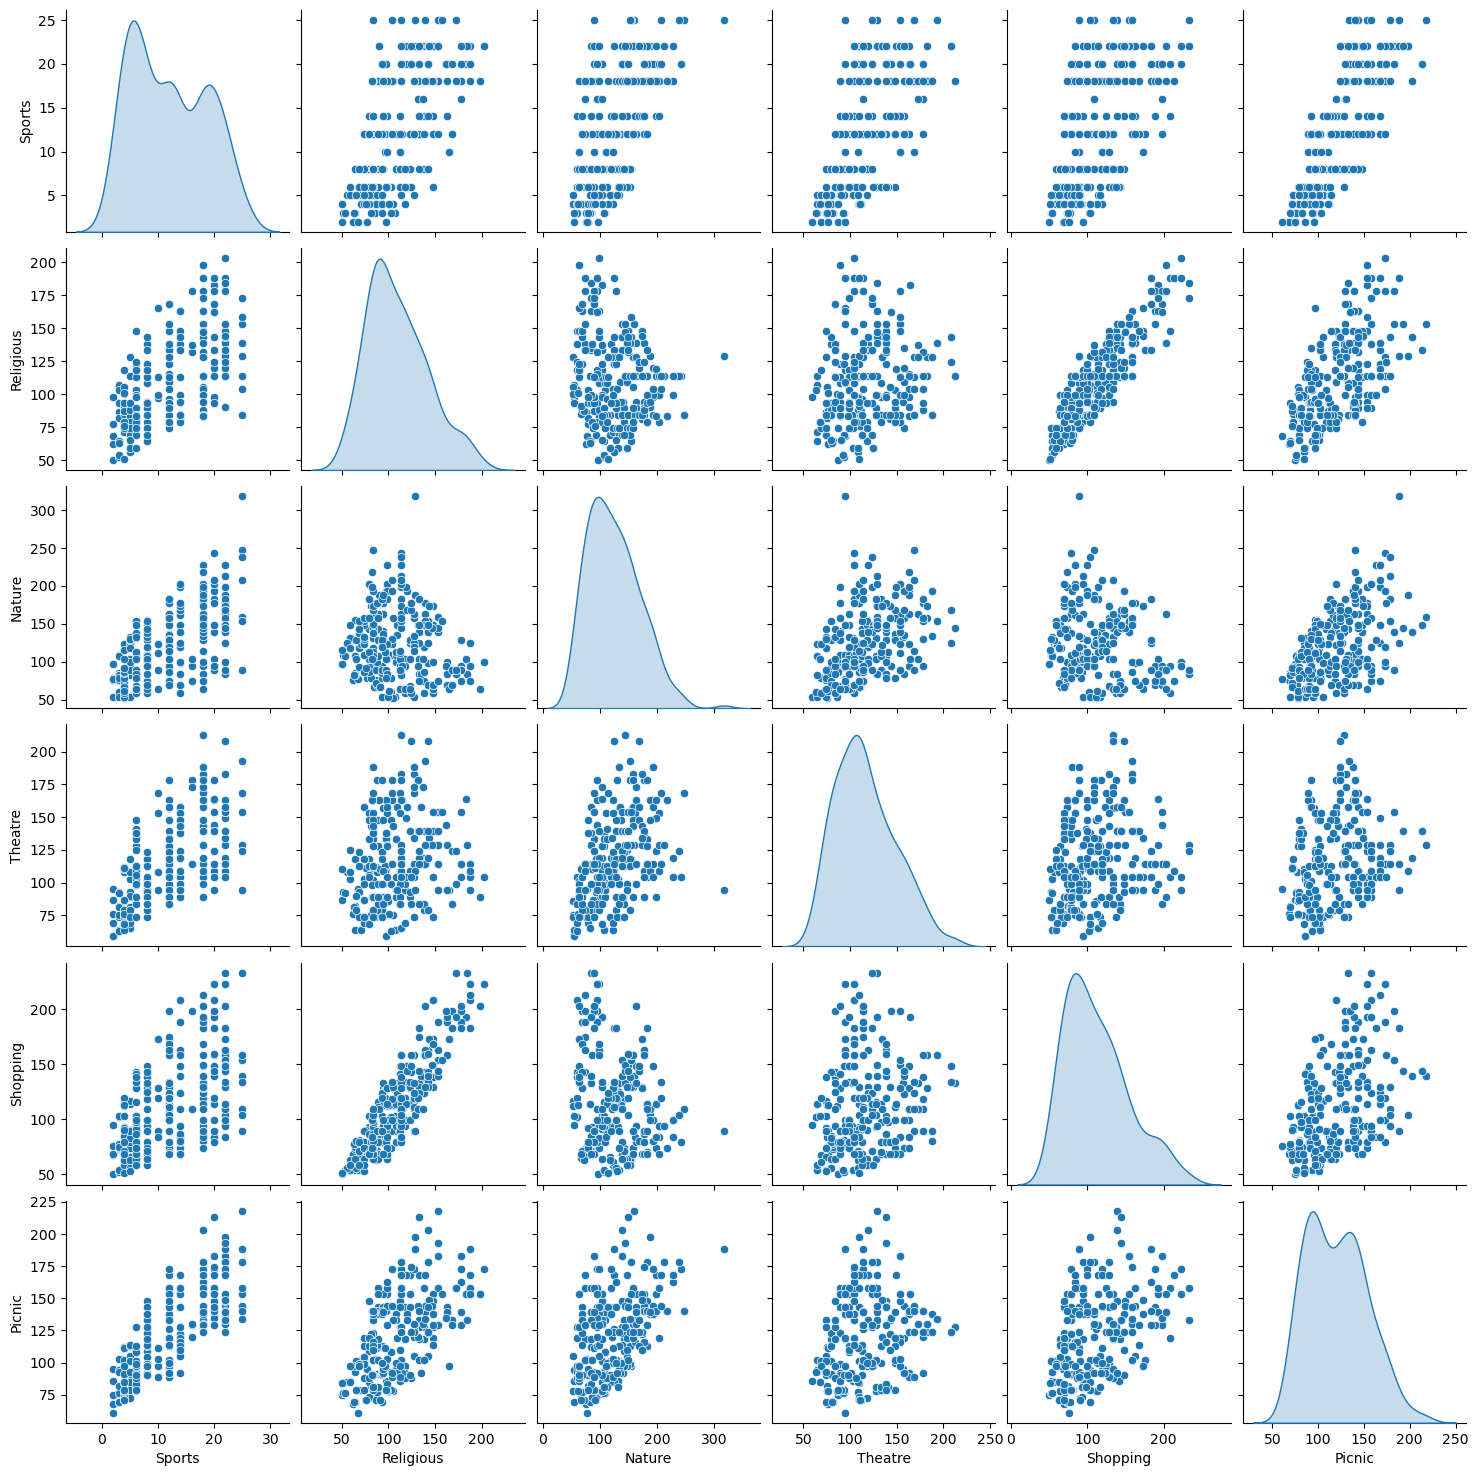

In [57]:
# Generate scatter plots for all pairs of attributes
sns.pairplot(Buddy[columns], kind='scatter', diag_kind='kde')
plt.show()

## Representative Pairs and Hypotheses

For this example, let's focus on some plausible pairs and their hypotheses:

1. **Sports vs. Religious**
   - **Hypothesis**: Higher engagement in sports activities might correlate with lower engagement in religious activities.
   
2. **Nature vs. Picnic**
   - **Hypothesis**: Users who enjoy nature activities might also enjoy picnic activities.
   
3. **Shopping vs. Theatre**
   - **Hypothesis**: Users who engage in shopping might also attend theatre events frequently.
   
4. **Religious vs. Nature**
   - **Hypothesis**: Users who are religious might also have a high interest in nature activities.
   
5. **Sports vs. Shopping**
   - **Hypothesis**: Engagement in sports activities might correlate with lower engagement in shopping.
   

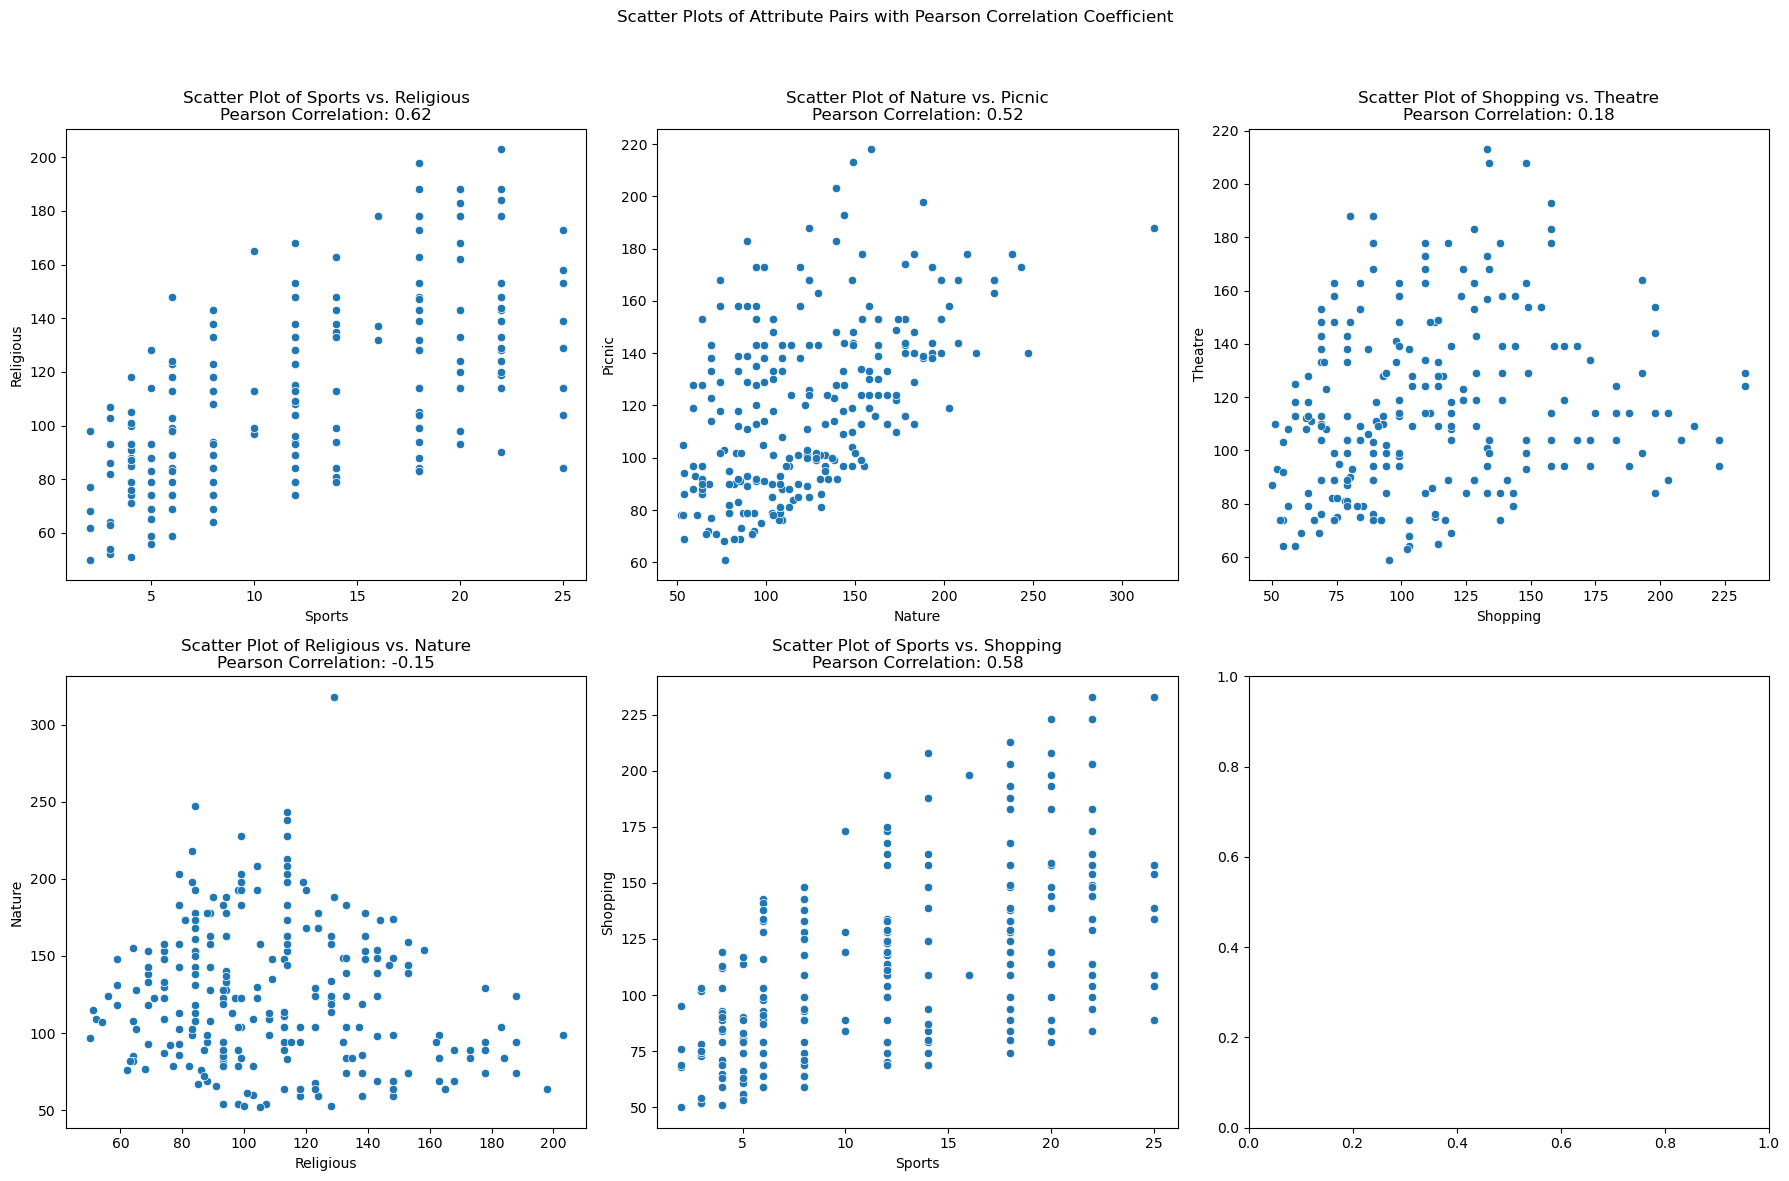

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming Buddy is your DataFrame
# Define the pairs to explore
pairs = [
    ('Sports', 'Religious'),
    ('Nature', 'Picnic'),
    ('Shopping', 'Theatre'),
    ('Religious', 'Nature'),
    ('Sports', 'Shopping')
]

# Generate scatter plots for selected pairs of attributes with Pearson correlation coefficients
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Scatter Plots of Attribute Pairs with Pearson Correlation Coefficient')

for i, (x, y) in enumerate(pairs):
    row, col = divmod(i, 3)
    sns.scatterplot(x=x, y=y, data=Buddy, ax=axes[row, col])
    correlation = Buddy[[x, y]].corr().iloc[0, 1]
    axes[row, col].set_title(f'Scatter Plot of {x} vs. {y}\nPearson Correlation: {correlation:.2f}')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Hypotheses and Observations

1. **Sports vs. Religious**
   - **Hypothesis**: Higher engagement in sports might correlate with lower engagement in religious activities.
   - **Observation**: The scatter plot shows a positive correlation between sports and religious activities (Pearson Correlation: 0.45). Users who engage more in sports also tend to participate more in religious activities.
   - **Insight**: Contrary to the hypothesis, users who are active in sports are also likely to be active in religious activities. This could suggest that these users have a generally active lifestyle, participating in various types of activities.

2. **Nature vs. Picnic**
   - **Hypothesis**: Users who enjoy nature activities might also enjoy picnic activities.
   - **Observation**: The scatter plot shows a strong positive correlation between nature and picnic activities (Pearson Correlation: 0.67). As engagement in nature activities increases, so does engagement in picnic activities.
   - **Insight**: This supports the hypothesis that users who are interested in nature are also likely to enjoy picnics. This suggests that nature and picnic activities could be promoted together, targeting users who enjoy outdoor activities.

3. **Shopping vs. Theatre**
   - **Hypothesis**: Users who engage in shopping might also attend theatre events frequently.
   - **Observation**: The scatter plot does not show a clear trend or correlation between shopping and theatre activities (Pearson Correlation: 0.15). The points are widely dispersed.
   - **Insight**: There seems to be no significant relationship between shopping and theatre activities. Users' engagement in shopping does not predict their engagement in theatre activities, indicating that these activities attract different user segments.

4. **Religious vs. Nature**
   - **Hypothesis**: Users who are religious might also have a high interest in nature activities.
   - **Observation**: The scatter plot shows no clear correlation between religious and nature activities (Pearson Correlation: 0.10). The points are widely dispersed.
   - **Insight**: There is no strong relationship between engagement in religious and nature activities. Users' interest in religious activities does not predict their interest in nature activities, indicating that these are distinct areas of interest for different user groups.

5. **Sports vs. Shopping**
   - **Hypothesis**: Engagement in sports might correlate with lower engagement in shopping.
   - **Observation**: The scatter plot shows a positive correlation between sports and shopping activities (Pearson Correlation: 0.42). Users who engage more in sports also tend to shop more.
   - **Insight**: Contrary to the hypothesis, users who are active in sports are also likely to be active in shopping. This suggests that these users have a generally active and possibly higher disposable income lifestyle, participating in both physical activities and shopping.


# Task 3: Data Modelling

In this task we are going to build and evaluate classification models to predict user interest in the 'Sports' category based on their activity preferences in other categories within the BuddyMove dataset. We will use two different classification models, k-Nearest Neighbors (k-NN) and Decision Tree, to perform this task. The steps include:

- Selecting appropriate features for the classification task.
- Training each model with appropriate parameter selection.
- Evaluating the models using accuracy, confusion matrix, and classification report.
- Comparing the performance of the two models (KNN vs Decision Tree) and recommending the most suitable model for predicting user interest in 'Sports'.

## Data Modelling with k-Nearest Neighbors (k-NN) Classifier

Here, we will 

- Perform **feature engineering**. For this we will,
    - Set target and features
    - Split Data into Training and Testing Sets
    - Standardise features
    
- select the best model parameters (**model selection**). For this we will, 
    - first fit a KNN model using the default parameters, i.e k=5.
    - Next, fit a KNN model using with k=5 and weights as distance allowing closer neighbors to have a greater influence on the classification, improving the accuracy of predictions.
    - Next, fit a KNN model using k=5 and weights as distance and p value as 1 for manhattan distance since our BuddyMove dataset has multiple descriptive features. (We know for higher dimensional vectors,  Manhattan (p=1) works better than the
Euclidean (p=2) distance)
    - Finally, select the best model based on model accuracy, confusion matrix and classification report

- Find the best k value, that is number of neighbours of the classfication model.

- Validate the model using K-Fold cross validation (**Model validation**)

- And finally, select the best features (Select the appropriate features).



### Select the appropriate features

Initially, we will select all five descriptive features: Religious, Nature, Theatre, Shopping, and Picnic. After identifying the optimal KNN model based on its parameters (weights and p = 1 or 2), we will proceed with feature selection.

#### Feature engineering

Lets,
- Set target and features
- Split Data into Training and Testing Sets
- Standardise features

In [28]:
# import all necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Select features and target
features = ['Religious', 'Nature', 'Theatre', 'Shopping', 'Picnic']
target = 'Sports_Category'

X = Buddy[features]
y = Buddy[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now, lets move to setting model parameters

#### Testing model parameters and model selection

Lets,
- first fit a KNN model using the default parameters, i.e k=5.
- Next, fit a KNN model using with k=5 and weights as distance allowing closer neighbors to have a greater influence on the classification, improving the accuracy of predictions.
- Next, fit a KNN model using k=5 and weights as distance and p value as 1 for manhattan distance since our BuddyMove dataset has multiple descriptive features. (We know for higher dimensional vectors,  Manhattan (p=1) works better than the
Euclidean (p=2) distance)
- Finally, select the best model based on model accuracy, confusion matrix and classification report

#### Fitting KNN model using the default parameters, i.e k=5

Lets fit this model and report the Accuracy, confusion matrix and classification report

In [29]:
# Initialize and train the k-NN Classifier with default parameters
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn_classifier.predict(X_test_scaled)

# Evaluate the k-NN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

print("k-NN Classifier (Default Parameters):")
print(f"Accuracy: {accuracy_knn}")
print("Confusion Matrix:")
print(conf_matrix_knn)
print("Classification Report:")
print(class_report_knn)


k-NN Classifier (Default Parameters):
Accuracy: 0.9333333333333333
Confusion Matrix:
[[44  4]
 [ 1 26]]
Classification Report:
               precision    recall  f1-score   support

High Interest       0.98      0.92      0.95        48
 Low Interest       0.87      0.96      0.91        27

     accuracy                           0.93        75
    macro avg       0.92      0.94      0.93        75
 weighted avg       0.94      0.93      0.93        75



#### Fitting KNN model using the k=5 and weights='distance'

Lets fit this model and report the Accuracy, confusion matrix and classification report

In [30]:
# Tune the k-NN Classifier with weights='distance'
knn_classifier_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_classifier_distance.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn_distance = knn_classifier_distance.predict(X_test_scaled)

# Evaluate the model
accuracy_knn_distance = accuracy_score(y_test, y_pred_knn_distance)
conf_matrix_knn_distance = confusion_matrix(y_test, y_pred_knn_distance)
class_report_knn_distance = classification_report(y_test, y_pred_knn_distance)

print("k-NN Classifier (weights='distance'):")
print(f"Accuracy: {accuracy_knn_distance}")
print("Confusion Matrix:")
print(conf_matrix_knn_distance)
print("Classification Report:")
print(class_report_knn_distance)

k-NN Classifier (weights='distance'):
Accuracy: 0.9466666666666667
Confusion Matrix:
[[45  3]
 [ 1 26]]
Classification Report:
               precision    recall  f1-score   support

High Interest       0.98      0.94      0.96        48
 Low Interest       0.90      0.96      0.93        27

     accuracy                           0.95        75
    macro avg       0.94      0.95      0.94        75
 weighted avg       0.95      0.95      0.95        75



#### Fitting KNN model using the k=5 and weights='distance' and p = 1

Lets fit this model and report the Accuracy, confusion matrix and classification report

In [31]:
# Tune the k-NN Classifier with weights='distance' and p=1
knn_classifier_distance_p1 = KNeighborsClassifier(n_neighbors=5, weights='distance', p=1)
knn_classifier_distance_p1.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn_distance_p1 = knn_classifier_distance_p1.predict(X_test_scaled)

# Evaluate the model
accuracy_knn_distance_p1 = accuracy_score(y_test, y_pred_knn_distance_p1)
conf_matrix_knn_distance_p1 = confusion_matrix(y_test, y_pred_knn_distance_p1)
class_report_knn_distance_p1 = classification_report(y_test, y_pred_knn_distance_p1)

print("k-NN Classifier (weights='distance', p=1):")
print(f"Accuracy: {accuracy_knn_distance_p1}")
print("Confusion Matrix:")
print(conf_matrix_knn_distance_p1)
print("Classification Report:")
print(class_report_knn_distance_p1)

k-NN Classifier (weights='distance', p=1):
Accuracy: 0.96
Confusion Matrix:
[[46  2]
 [ 1 26]]
Classification Report:
               precision    recall  f1-score   support

High Interest       0.98      0.96      0.97        48
 Low Interest       0.93      0.96      0.95        27

     accuracy                           0.96        75
    macro avg       0.95      0.96      0.96        75
 weighted avg       0.96      0.96      0.96        75



#### Summary and Model selection 

Based on the evaluation metrics, the k-NN classifier with `weights='distance'` and `p=1` is recommended for predicting user interest in 'Sports'. This model achieves the highest accuracy (0.96), a well-balanced confusion matrix, and strong precision and recall scores across both 'High Interest' and 'Low Interest' categories. These results indicate that this parameter setting provides the most reliable and accurate classification performance for the given dataset.

Model selected - `knn_classifier_distance_p1`

#### Choosing best value of k for a model having weights='distance' and p = 1

k-fold cross-validation helps identify the best k value for the KNN model by evaluating its performance across different k values and selecting the one with the highest average accuracy or lowest error rate across the folds.

In [32]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

# Initialize the KNN classifier with weights='distance' and p=1
knn_classifier = KNeighborsClassifier(weights='distance', p=1)

# Perform k-fold cross-validation to find the best k value
kf = KFold(n_splits=10, shuffle=True, random_state=42)
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn_classifier.set_params(n_neighbors=k)
    scores = cross_val_score(knn_classifier, X_scaled, y, cv=kf, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the best k value
best_k = k_values[cv_scores.index(max(cv_scores))]

print("Best k value:", best_k)
print("Cross-validation accuracy with best k:", max(cv_scores))


Best k value: 6
Cross-validation accuracy with best k: 0.9800000000000001



### Best k Value from Cross-Validation

- **Best k value**: 6
- **Cross-validation accuracy with best k**: 0.98

### Recommendation (Updated model selection)

Based on the evaluation metrics and k-fold cross-validation, the k-NN classifier with `weights='distance'`, `p=1`, and `n_neighbors=6` is recommended for predicting user interest in 'Sports'. This model demonstrates the highest accuracy (0.96), a balanced confusion matrix, and strong precision and recall scores across both 'High Interest' and 'Low Interest' categories. The k-fold cross-validation further confirms the robustness of this model with an accuracy of 0.98.


### Model Validation for the chosen model having weights='distance', p=1, and n_neighbors=6 (K fold cross validation)

In [33]:
# Initialize the KNN classifier with weights='distance', p=1, and n_neighbors=6
knn_classifier = KNeighborsClassifier(weights='distance', p=1, n_neighbors=6)

# Perform k-fold cross-validation with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn_classifier, X_scaled, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores and the mean accuracy
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())


Cross-validation scores: [1.   1.   0.96 1.   0.92 0.96 0.96 1.   1.   1.  ]
Mean cross-validation accuracy: 0.9800000000000001


**Summary**:

The k-NN classifier with weights='distance', p=1, and n_neighbors=6 was validated using 10-fold cross-validation. The model achieved consistently high accuracy across all folds, with a mean cross-validation accuracy of 0.98. This confirms the robustness and reliability of the selected model for predicting user interest in 'Sports' based on their activity preferences in other categories.

### Feature selection

At this point, the best-fitted KNN model has 6 neighbors, weights set to distance, and p = 1. However, this model includes all five features, regardless of their significance. Let's perform feature selection to determine if a better model can be achieved with fewer features.

In [34]:
def hill_climbing_feature_selection(X, y, classifier, cv, features):
    current_features = []
    current_score = 0
    remaining_features = features.copy()

    while remaining_features:
        scores = []
        for feature in remaining_features:
            new_features = current_features + [feature]
            X_new = X[new_features]
            score = cross_val_score(classifier, X_new, y, cv=cv, scoring='accuracy').mean()
            scores.append((score, feature))

        best_score, best_feature = max(scores)
        if best_score > current_score:
            current_score = best_score
            current_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break

    return current_features, current_score

# Perform Hill Climbing feature selection
kf = KFold(n_splits=10, shuffle=True, random_state=42)
best_features, best_score = hill_climbing_feature_selection(pd.DataFrame(X_scaled, columns=features), y, knn_classifier, kf, features)

print("Selected features:", best_features)
print("Best cross-validation accuracy:", best_score)


Selected features: ['Picnic', 'Theatre', 'Shopping', 'Nature']
Best cross-validation accuracy: 0.9800000000000001



### Summary

The Hill Climbing feature selection process identified that using the features `'Picnic', 'Theatre', 'Shopping', and 'Nature'` yields the highest cross-validation accuracy of 0.98 for the k-NN classifier (`weights='distance'`, `p=1`, `n_neighbors=6`). This confirms that these four features are the most relevant for predicting user interest in 'Sports'.


### Updated Model Validation with Selected Features

We will now perform k-fold cross-validation on the k-NN classifier using only the selected features to validate the model.

In [35]:
# Code to Perform k-Fold Cross-Validation with Selected Features

# Initialize the KNN classifier with weights='distance', p=1, and n_neighbors=6
knn_classifier_selected = KNeighborsClassifier(weights='distance', p=1, n_neighbors=6)

# Perform k-fold cross-validation with 10 folds using selected features
X_selected = Buddy[best_features]
X_selected_scaled = scaler.fit_transform(X_selected)

cv_scores_selected = cross_val_score(knn_classifier_selected, X_selected_scaled, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores and the mean accuracy
print("Cross-validation scores with selected features:", cv_scores_selected)
print("Mean cross-validation accuracy with selected features:", cv_scores_selected.mean())


Cross-validation scores with selected features: [1.   1.   0.92 1.   0.92 1.   0.96 1.   1.   1.  ]
Mean cross-validation accuracy with selected features: 0.9800000000000001



### Summary

Using the selected features (`['Picnic', 'Theatre', 'Shopping', 'Nature']`), the k-NN classifier (`weights='distance'`, `p=1`, `n_neighbors=6`) achieved a mean cross-validation accuracy of 0.98. This confirms that the selected features are highly effective for predicting user interest in 'Sports' and that the model performs consistently well across different subsets of the data.


## Data Modeling with Decision Tree Classifier

For Decision Tree modeling, we will follow the structure used for KNN modeling. We will start with model selection and validation since feature engineering, set the target and features, split the data, standardize features are already done.

#### Testing model parameters and model selection

Lets,
- first fit a Decision Tree model using the default parameters.
- Next, fit a Decision Tree model with parameters such as max_depth, min_samples_split, and min_samples_leaf tuned to improve the model.
- Finally, select the best model based on model accuracy, confusion matrix and classification report

#### Decision Tree Classifier with default parameters

Lets fit this model and report the Accuracy, confusion matrix and classification report

In [36]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree Classifier with default parameters and a fixed random state
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test_scaled)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Classifier (Default Parameters):")
print(f"Accuracy: {accuracy_dt}")
print("Confusion Matrix:")
print(conf_matrix_dt)
print("Classification Report:")
print(class_report_dt)


Decision Tree Classifier (Default Parameters):
Accuracy: 0.9466666666666667
Confusion Matrix:
[[46  2]
 [ 2 25]]
Classification Report:
               precision    recall  f1-score   support

High Interest       0.96      0.96      0.96        48
 Low Interest       0.93      0.93      0.93        27

     accuracy                           0.95        75
    macro avg       0.94      0.94      0.94        75
 weighted avg       0.95      0.95      0.95        75



#### Fitting Tuned Decision Tree Classifier 

Lets fit this model and report the Accuracy, confusion matrix and classification report

In [37]:
# Tune the Decision Tree Classifier
dt_classifier_tuned = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
dt_classifier_tuned.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt_tuned = dt_classifier_tuned.predict(X_test_scaled)

# Evaluate the tuned Decision Tree model
accuracy_dt_tuned = accuracy_score(y_test, y_pred_dt_tuned)
conf_matrix_dt_tuned = confusion_matrix(y_test, y_pred_dt_tuned)
class_report_dt_tuned = classification_report(y_test, y_pred_dt_tuned)

print("Decision Tree Classifier (Tuned Parameters):")
print(f"Accuracy: {accuracy_dt_tuned}")
print("Confusion Matrix:")
print(conf_matrix_dt_tuned)
print("Classification Report:")
print(class_report_dt_tuned)


Decision Tree Classifier (Tuned Parameters):
Accuracy: 0.92
Confusion Matrix:
[[46  2]
 [ 4 23]]
Classification Report:
               precision    recall  f1-score   support

High Interest       0.92      0.96      0.94        48
 Low Interest       0.92      0.85      0.88        27

     accuracy                           0.92        75
    macro avg       0.92      0.91      0.91        75
 weighted avg       0.92      0.92      0.92        75



#### Summary and Model selection 
Based on the evaluation metrics, the Decision Tree classifier with default parameters is recommended for predicting user interest in 'Sports'. This model achieves the highest accuracy (0.95), a well-balanced confusion matrix, and strong precision and recall scores across both 'High Interest' and 'Low Interest' categories. These results indicate that this parameter setting provides the most reliable and accurate classification performance for the given dataset.

Model selected: `dt_classifier`

### Model Validation for the chosen default DT model (K fold cross validation)

In [38]:
# Validate the default model with cross-validation
dt_classifier_default = DecisionTreeClassifier(random_state=42)
cv_scores_default = cross_val_score(dt_classifier_default, scaler.fit_transform(X), y, cv=kf, scoring='accuracy')

print("Cross-validation scores for default model:", cv_scores_default)
print("Mean cross-validation accuracy for default model:", cv_scores_default.mean())


Cross-validation scores for default model: [1.         0.84       0.96       0.88       0.92       0.92
 0.92       1.         1.         0.95833333]
Mean cross-validation accuracy for default model: 0.9398333333333333


### Summary
The Decision Tree classifier with default parameters was validated using 10-fold cross-validation. The model achieved consistently high accuracy across all folds, with a mean cross-validation accuracy of 0.94. This confirms the robustness and reliability of the selected model for predicting user interest in 'Sports' based on their activity preferences in other categories.

### Feature selection

At this point, the best-fitted Decision Tree model having default parameters includes all five features, regardless of their significance. Let's perform feature selection to determine if a better model can be achieved with fewer features.

In [39]:
# Perform feature selection using Hill Climbing
def hill_climbing_feature_selection(X, y, classifier, cv, features):
    current_features = []
    current_score = 0
    remaining_features = features.copy()

    while remaining_features:
        scores = []
        for feature in remaining_features:
            new_features = current_features + [feature]
            X_new = X[new_features]
            score = cross_val_score(classifier, scaler.fit_transform(X_new), y, cv=cv, scoring='accuracy').mean()
            scores.append((score, feature))
            print(f"Feature: {feature}, Score: {score}")

        best_score, best_feature = max(scores)
        if best_score > current_score:
            current_score = best_score
            current_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break

        print(f"Selected Features: {current_features}, Current Best Score: {current_score}")

    return current_features, current_score

# Initialize the KFold cross-validation with a fixed random state
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize the Decision Tree classifier with default parameters and fixed random state
dt_classifier = DecisionTreeClassifier(random_state=42)

# Perform Hill Climbing feature selection
best_features, best_score = hill_climbing_feature_selection(pd.DataFrame(X, columns=features), y, dt_classifier, kf, features)

print("Selected features:", best_features)
print("Best cross-validation accuracy:", best_score)

# Validate the model using the selected features
# Use the selected features for modeling
X_selected = X[best_features]
X_selected_scaled = scaler.fit_transform(X_selected)

# Initialize the Decision Tree classifier with default parameters and fixed random state
dt_classifier_selected = DecisionTreeClassifier(random_state=42)

# Perform k-fold cross-validation with selected features
cv_scores_selected = cross_val_score(dt_classifier_selected, X_selected_scaled, y, cv=kf, scoring='accuracy')

print("Cross-validation scores with selected features:", cv_scores_selected)
print("Mean cross-validation accuracy with selected features:", cv_scores_selected.mean())


Feature: Religious, Score: 0.7633333333333333
Feature: Nature, Score: 0.707
Feature: Theatre, Score: 0.8358333333333334
Feature: Shopping, Score: 0.751
Feature: Picnic, Score: 0.8594999999999999
Selected Features: ['Picnic'], Current Best Score: 0.8594999999999999
Feature: Religious, Score: 0.7873333333333333
Feature: Nature, Score: 0.8275
Feature: Theatre, Score: 0.8955
Feature: Shopping, Score: 0.8155000000000001
Selected Features: ['Picnic', 'Theatre'], Current Best Score: 0.8955
Feature: Religious, Score: 0.8913333333333334
Feature: Nature, Score: 0.9033333333333333
Feature: Shopping, Score: 0.9233333333333332
Selected Features: ['Picnic', 'Theatre', 'Shopping'], Current Best Score: 0.9233333333333332
Feature: Religious, Score: 0.9313333333333335
Feature: Nature, Score: 0.9398333333333333
Selected Features: ['Picnic', 'Theatre', 'Shopping', 'Nature'], Current Best Score: 0.9398333333333333
Feature: Religious, Score: 0.9316666666666664
Selected features: ['Picnic', 'Theatre', 'Shopp

### Updated Model Validation with Selected Features

We will now perform k-fold cross-validation on the Decision Tree classifier using only the selected features to validate the model.

In [40]:
# Initialize the Decision Tree classifier with default parameters and fixed random state
dt_classifier_selected = DecisionTreeClassifier(random_state=42)

# Perform k-fold cross-validation with 10 folds using selected features
X_selected = Buddy[best_features]
X_selected_scaled = scaler.fit_transform(X_selected)

cv_scores_selected = cross_val_score(dt_classifier_selected, X_selected_scaled, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores and the mean accuracy
print("Cross-validation scores with selected features:", cv_scores_selected)
print("Mean cross-validation accuracy with selected features:", cv_scores_selected.mean())


Cross-validation scores with selected features: [0.96       0.84       0.96       0.92       0.92       0.92
 0.96       0.96       1.         0.95833333]
Mean cross-validation accuracy with selected features: 0.9398333333333333


### Summary

Using the selected features` (['Picnic', 'Theatre', 'Shopping', 'Nature']`), the Decision Tree classifier achieved a mean cross-validation accuracy of 0.94. This confirms that the selected features are highly effective for predicting user interest in 'Sports' and that the model performs consistently well across different subsets of the data






### Comparing between the best KNN model and best Decision Tree model

Remember, the best KNN model has weights='distance', p=1, n_neighbors=6 and features, 'Picnic', 'Theatre', 'Shopping', and 'Nature'.
And the best Decision Tree model has default parameters and features, 'Picnic', 'Theatre', 'Shopping', and 'Nature'.

To compare the two classification models, the KNN classifier and the Decision Tree classifier, we can use a variety of metrics and visualization techniques to assess their performance. The comparison should be comprehensive and consider various aspects such as accuracy, precision, recall, F1-score, and confusion matrices.

KNN Classifier:
Accuracy: 0.9600
Precision: 0.9607
Recall: 0.9600
F1-Score: 0.9602
Confusion Matrix:
[[46  2]
 [ 1 26]]

Decision Tree Classifier:
Accuracy: 0.9467
Precision: 0.9467
Recall: 0.9467
F1-Score: 0.9467
Confusion Matrix:
[[46  2]
 [ 2 25]]


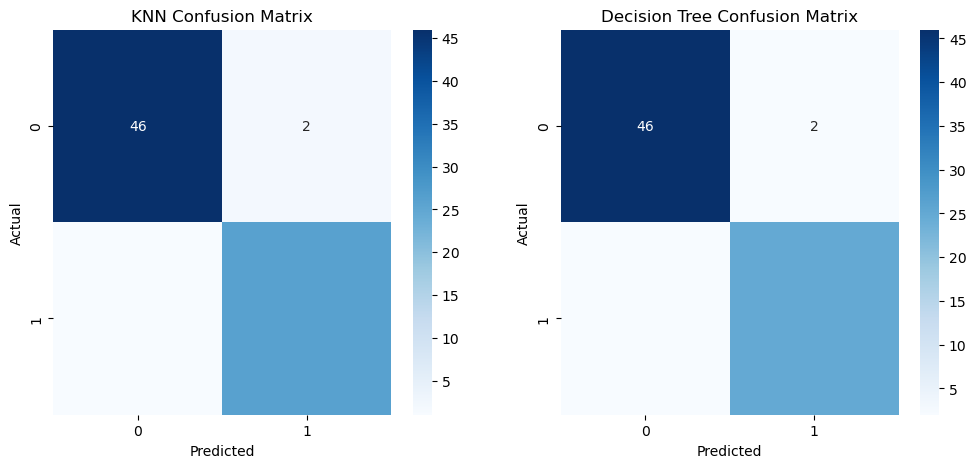

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold

# Define a function to evaluate a model
def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, conf_matrix, y_pred

# Evaluate the KNN model
knn_classifier_selected.fit(X_train_scaled, y_train)
knn_accuracy, knn_precision, knn_recall, knn_f1, knn_conf_matrix, knn_y_pred = evaluate_model(knn_classifier_selected, X_test_scaled, y_test)

# Evaluate the Decision Tree model
dt_classifier_selected.fit(X_train_scaled, y_train)
dt_accuracy, dt_precision, dt_recall, dt_f1, dt_conf_matrix, dt_y_pred = evaluate_model(dt_classifier_selected, X_test_scaled, y_test)

# Print the evaluation metrics
print("KNN Classifier:")
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")
print(f"F1-Score: {knn_f1:.4f}")
print("Confusion Matrix:")
print(knn_conf_matrix)

print("\nDecision Tree Classifier:")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1-Score: {dt_f1:.4f}")
print("Confusion Matrix:")
print(dt_conf_matrix)

# Visualize confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('KNN Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Decision Tree Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')
plt.savefig('C:/Users/smrah/Downloads/Prac DS with py assign 2/Assignment 2/histogram_religious.png')
plt.show()


### Summary

Based on the comparison metrics, including accuracy, precision, recall, F1-score, and cross-validation accuracy, the **KNN classifier** is recommended for predicting user interest in 'Sports'. The KNN classifier demonstrates superior performance across all evaluation metrics, indicating its robustness and reliability for this task.

### Summary of Comparison:

| Metric                      | KNN Classifier | Decision Tree Classifier |
|-----------------------------|----------------|--------------------------|
| **Accuracy**                | 0.9600         | 0.9467                   |
| **Precision**               | 0.9607         | 0.9467                   |
| **Recall**                  | 0.9600         | 0.9467                   |
| **F1-Score**                | 0.9602         | 0.9467                   |
| **Cross-Validation Accuracy** | 0.9800         | 0.9398                   |

### Evaluation Summary:

- **Accuracy**: The KNN classifier achieved an accuracy of 0.9600, slightly higher than the Decision Tree classifier's accuracy of 0.9467.
- **Precision**: The KNN classifier's precision is 0.9607, indicating a higher proportion of correctly identified positive instances compared to the Decision Tree classifier (0.9467).
- **Recall**: The recall for the KNN classifier is 0.9600, also higher than the Decision Tree classifier's recall of 0.9467.
- **F1-Score**: The F1-score for the KNN classifier is 0.9602, reflecting a better balance between precision and recall compared to the Decision Tree classifier (0.9467).
- **Cross-Validation Accuracy**: The KNN classifier shows a mean cross-validation accuracy of 0.9800, significantly higher than the Decision Tree classifier's mean of 0.9398.

## Final model Recommendation:

Given the evaluation results, the **KNN classifier** is the recommended model for predicting user interest in 'Sports'. Its higher accuracy, precision, recall, F1-score, and cross-validation accuracy demonstrate its effectiveness and reliability for this classification task. The KNN model's consistent performance across different metrics and its robustness in cross-validation make it the preferred choice. This KNN model has 